<a href="https://colab.research.google.com/github/margherita-tar/Privacy-Fariness-Explainability-on-ACTG175/blob/main/ACTG175_Privacy_Fariness_and_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>








| #  | Nome     | Descrizione                                                                 | Tipo        | Valori possibili / Intervallo                                |
|----|----------|-----------------------------------------------------------------------------|-------------|--------------------------------------------------------------|
| 1  | label    | Stato del paziente al termine dello studio                                  | Binario     | 0 = Vivo, 1 = Morto                                          |
| 2  | time     | Giorni fino alla morte o fine dello studio                                  | Numerico    | ≥ 0 (numero di giorni)                                       |
| 3  | trt      | Tipo di combinazione di farmaci ricevuti                                    | Categoriale | 0 = ZDV, 1 = ZDV+ddI, 2 = ZDV+ddC, 3 = ddI                   |
| 4  | treat    | Tipologia di trattamento ricevuto                                           | Binario     | 0 = Solo ZDV, 1 = Altri trattamenti combinati               |
| 5  | offtrt   | Indicatore binario di non trattamento prima delle 96 settimane                                | Binario     | 0 = No, 1 = Sì                                               |
| 6  | age      | Età del paziente (anni)                                                     | Numerico    | interi ≥ 0                                                 |
| 7  | wtkg     | Peso del paziente in kg                                                     | Numerico    | decimale ≥ 0                                               |
| 8  | gender   | Sesso del paziente                                                          | Binario     | 0 = Femmina, 1 = Maschio                                     |
| 9  | race     | Razza del paziente                                                          | Binario     | 0 = Bianco, 1 = Non bianco                                   |
| 10 | hemo     | Diagnosi di Emofilia                                                    | Binario     | 0 = No, 1 = Sì                                               |
| 11 | homo     | Orientamento sessuale                                  | Binario     | 0 = No, 1 = Sì                                               |
| 12 | drugs    | Uso di droghe endovenose                                                    | Binario     | 0 = No, 1 = Sì                                               |
| 13 | symptom  | Presenza di sintomi della malattia                                          | Binario     | 0 = Asintomatico, 1 = Sintomatico                            |
| 14 | karnof   | Scala di Karnofsky: stato funzionale del paziente                           | Numerico    | 0 = morto, 100 = salute ottimale                             |
| 15 | oprior   | Trattamenti antiretrovirali diversi da ZDV prima dello studio               | Binario     | 0 = No, 1 = Sì                                               |
| 16 | z30      | Uso di ZDV nei 30 giorni prima dello studio                                 | Binario     | 0 = No, 1 = Sì                                               |
| 17 | zprior   | Uso di ZDV in qualunque momento prima dello studio                          | Binario     | 0 = No, 1 = Sì                                               |
| 18 | preanti  | Giorni di terapia antiretrovirale pre-studio                                | Numerico    | ≥ 0 (numero di giorni)                                       |
| 19 | str2     | Indicatore binario della storia antiretrovirale                                | Binario     | 0 = Mai trattato, 1 = Trattato                        |
| 20 | strat    | Durata del trattamento pregresso                                            | Categoriale | 1 = Mai trattato, 2 = 1-52 sett., 3 = >52 sett.              |
| 21 | cd40     | Conteggio cellule CD4 pre-trattamento                                       | Numerico    | Conteggio intero ml cubico di sangue                               |
| 22 | cd420    | Conteggio cellule CD4 dopo 20 settimane di trattamento                      | Numerico    | Conteggio intero ml cubico di sangue                               |
| 23 | cd80     | Conteggio cellule CD8 pre-trattamento                                       | Numerico    | Conteggio intero ml cubico sangue                              |
| 24 | cd820    | Conteggio cellule CD8 dopo 20 settimane di trattamento                      | Numerico    | Conteggio intero ml cubico sangue                               |

In [ ]:
# Import librerie essenziali
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import moduli da sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

print('Set-up completato!')

Set-up completato!


In [ ]:
# Installazione della libreria gdown (per scaricare da Google Drive)
!pip install --quiet gdown

# Scarica il file CSV dal link Google Drive
!gdown 1c6jEvpwn69wHd-4FifiZ0DHSsQWdiumw --output AIDS_ClinicalTrial_GroupStudy175.csv

# Lettura del file CSV in pandas
df = pd.read_csv("AIDS_ClinicalTrial_GroupStudy175.csv")

# Visualizzazione del dataset
pd.set_option('display.max_columns', None)
df.head(10)

Downloading...
From: https://drive.google.com/uc?id=1c6jEvpwn69wHd-4FifiZ0DHSsQWdiumw
To: /content/AIDS_ClinicalTrial_GroupStudy175.csv
100% 147k/147k [00:00<00:00, 76.1MB/s]


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1,1181,0,1,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,1,930,0,1,1,3,0,0,0,244,225,708,699,1
7,957,0,41,66.2256,0,1,1,100,0,1,1,1329,0,1,1,3,0,0,0,401,366,889,720,0
8,198,3,40,82.5552,0,1,0,90,0,1,1,1074,0,1,1,3,1,1,1,214,107,652,131,1
9,188,0,35,78.0192,0,1,0,100,0,1,1,964,0,1,1,3,0,0,1,221,132,221,759,1



Distribuzione delle Classi 
label
0    1618
1     521
Name: count, dtype: int64

Percentuali delle Classi (%) 
label
0    75.642824
1    24.357176
Name: proportion, dtype: float64


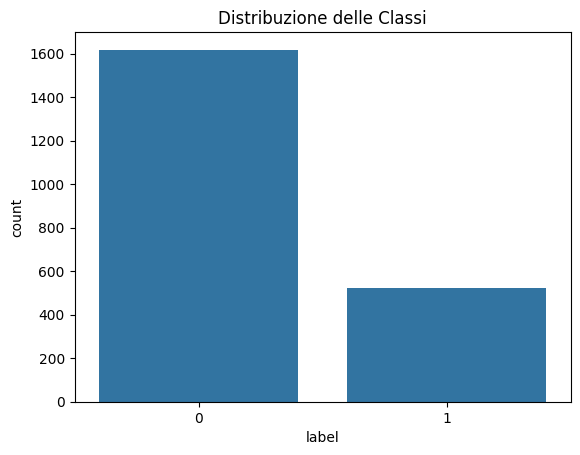


Dimensione del dataset
Righe: 2139, Colonne: 19

Tipi di Dato
time         int64
trt          int64
age          int64
wtkg       float64
hemo         int64
homo         int64
drugs        int64
karnof       int64
oprior       int64
z30          int64
preanti      int64
race         int64
gender       int64
strat        int64
symptom      int64
offtrt       int64
cd40         int64
cd80         int64
label        int64
dtype: object

Valori Mancanti per Colonna
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
strat      0
symptom    0
offtrt     0
cd40       0
cd80       0
label      0
dtype: int64

Statistiche descrittive variabili numeriche 


,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,symptom,offtrt,cd40,cd80,label
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.172978,0.362786,350.501169,986.627396,0.243572
std,292.274324,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.378317,0.480916,118.573863,480.197750,0.429338
min,14.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,727.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,263.500000,654.000000,0.000000
50%,997.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,0.000000,0.000000,340.000000,893.000000,0.000000
75%,1091.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,0.000000,1.000000,423.000000,1207.000000,0.000000
max,1231.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,1.000000,1199.000000,5011.000000,1.000000


In [ ]:
# Visualizzazione distribuzione delle classi
print("\nDistribuzione delle Classi ")
print(df['label'].value_counts())
print("\nPercentuali delle Classi (%) ")
print(df['label'].value_counts(normalize=True) * 100)

sns.countplot(x='label', data=df)
plt.title('Distribuzione delle Classi')
plt.show()

# Eliminazione variabili ridondanti
df = df.drop(columns=["treat", "str2", "cd820", "cd420", "zprior"], errors='ignore')

# Variabili numeriche
numeric_cols = ['time', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof','oprior', 'z30', 'preanti', 'race', 'gender', 'symptom', 'offtrt', 'cd40', 'cd80', 'label']

# Basic EDA
print("\nDimensione del dataset")
print(f"Righe: {df.shape[0]}, Colonne: {df.shape[1]}")

print("\nTipi di Dato")
print(df.dtypes)

print("\nValori Mancanti per Colonna")
print(df.isna().sum())

print("\nStatistiche descrittive variabili numeriche ")
df[numeric_cols].describe()



Correlation Matrix:


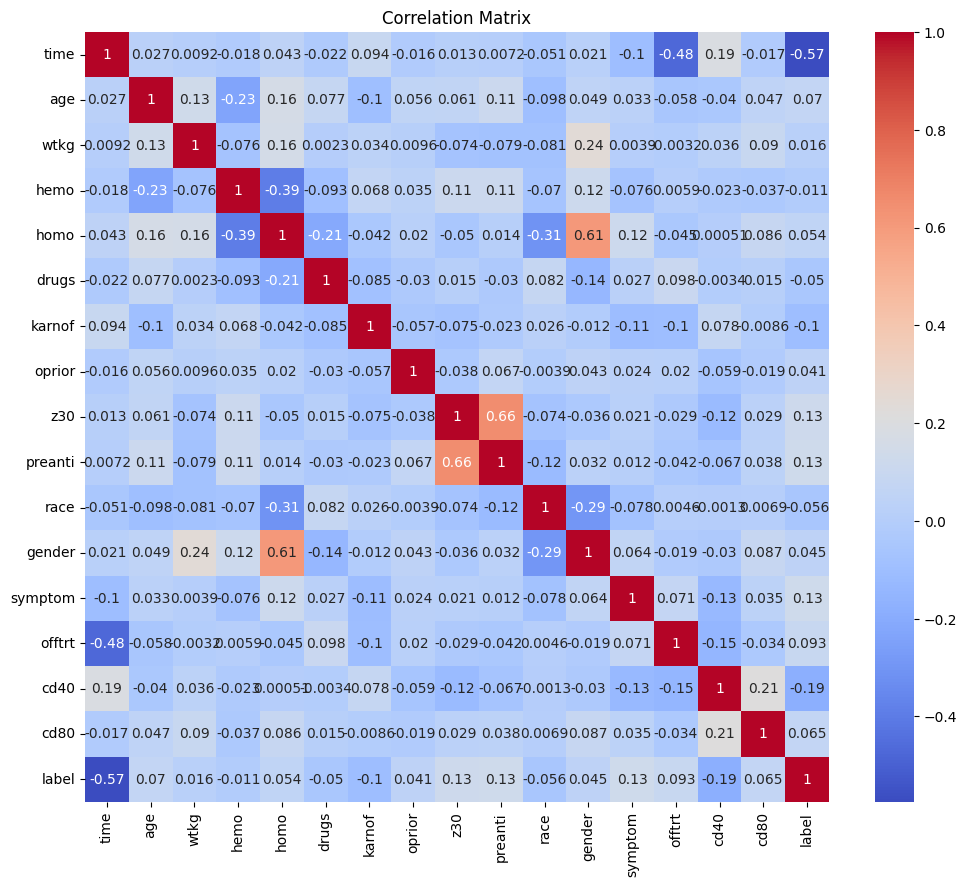

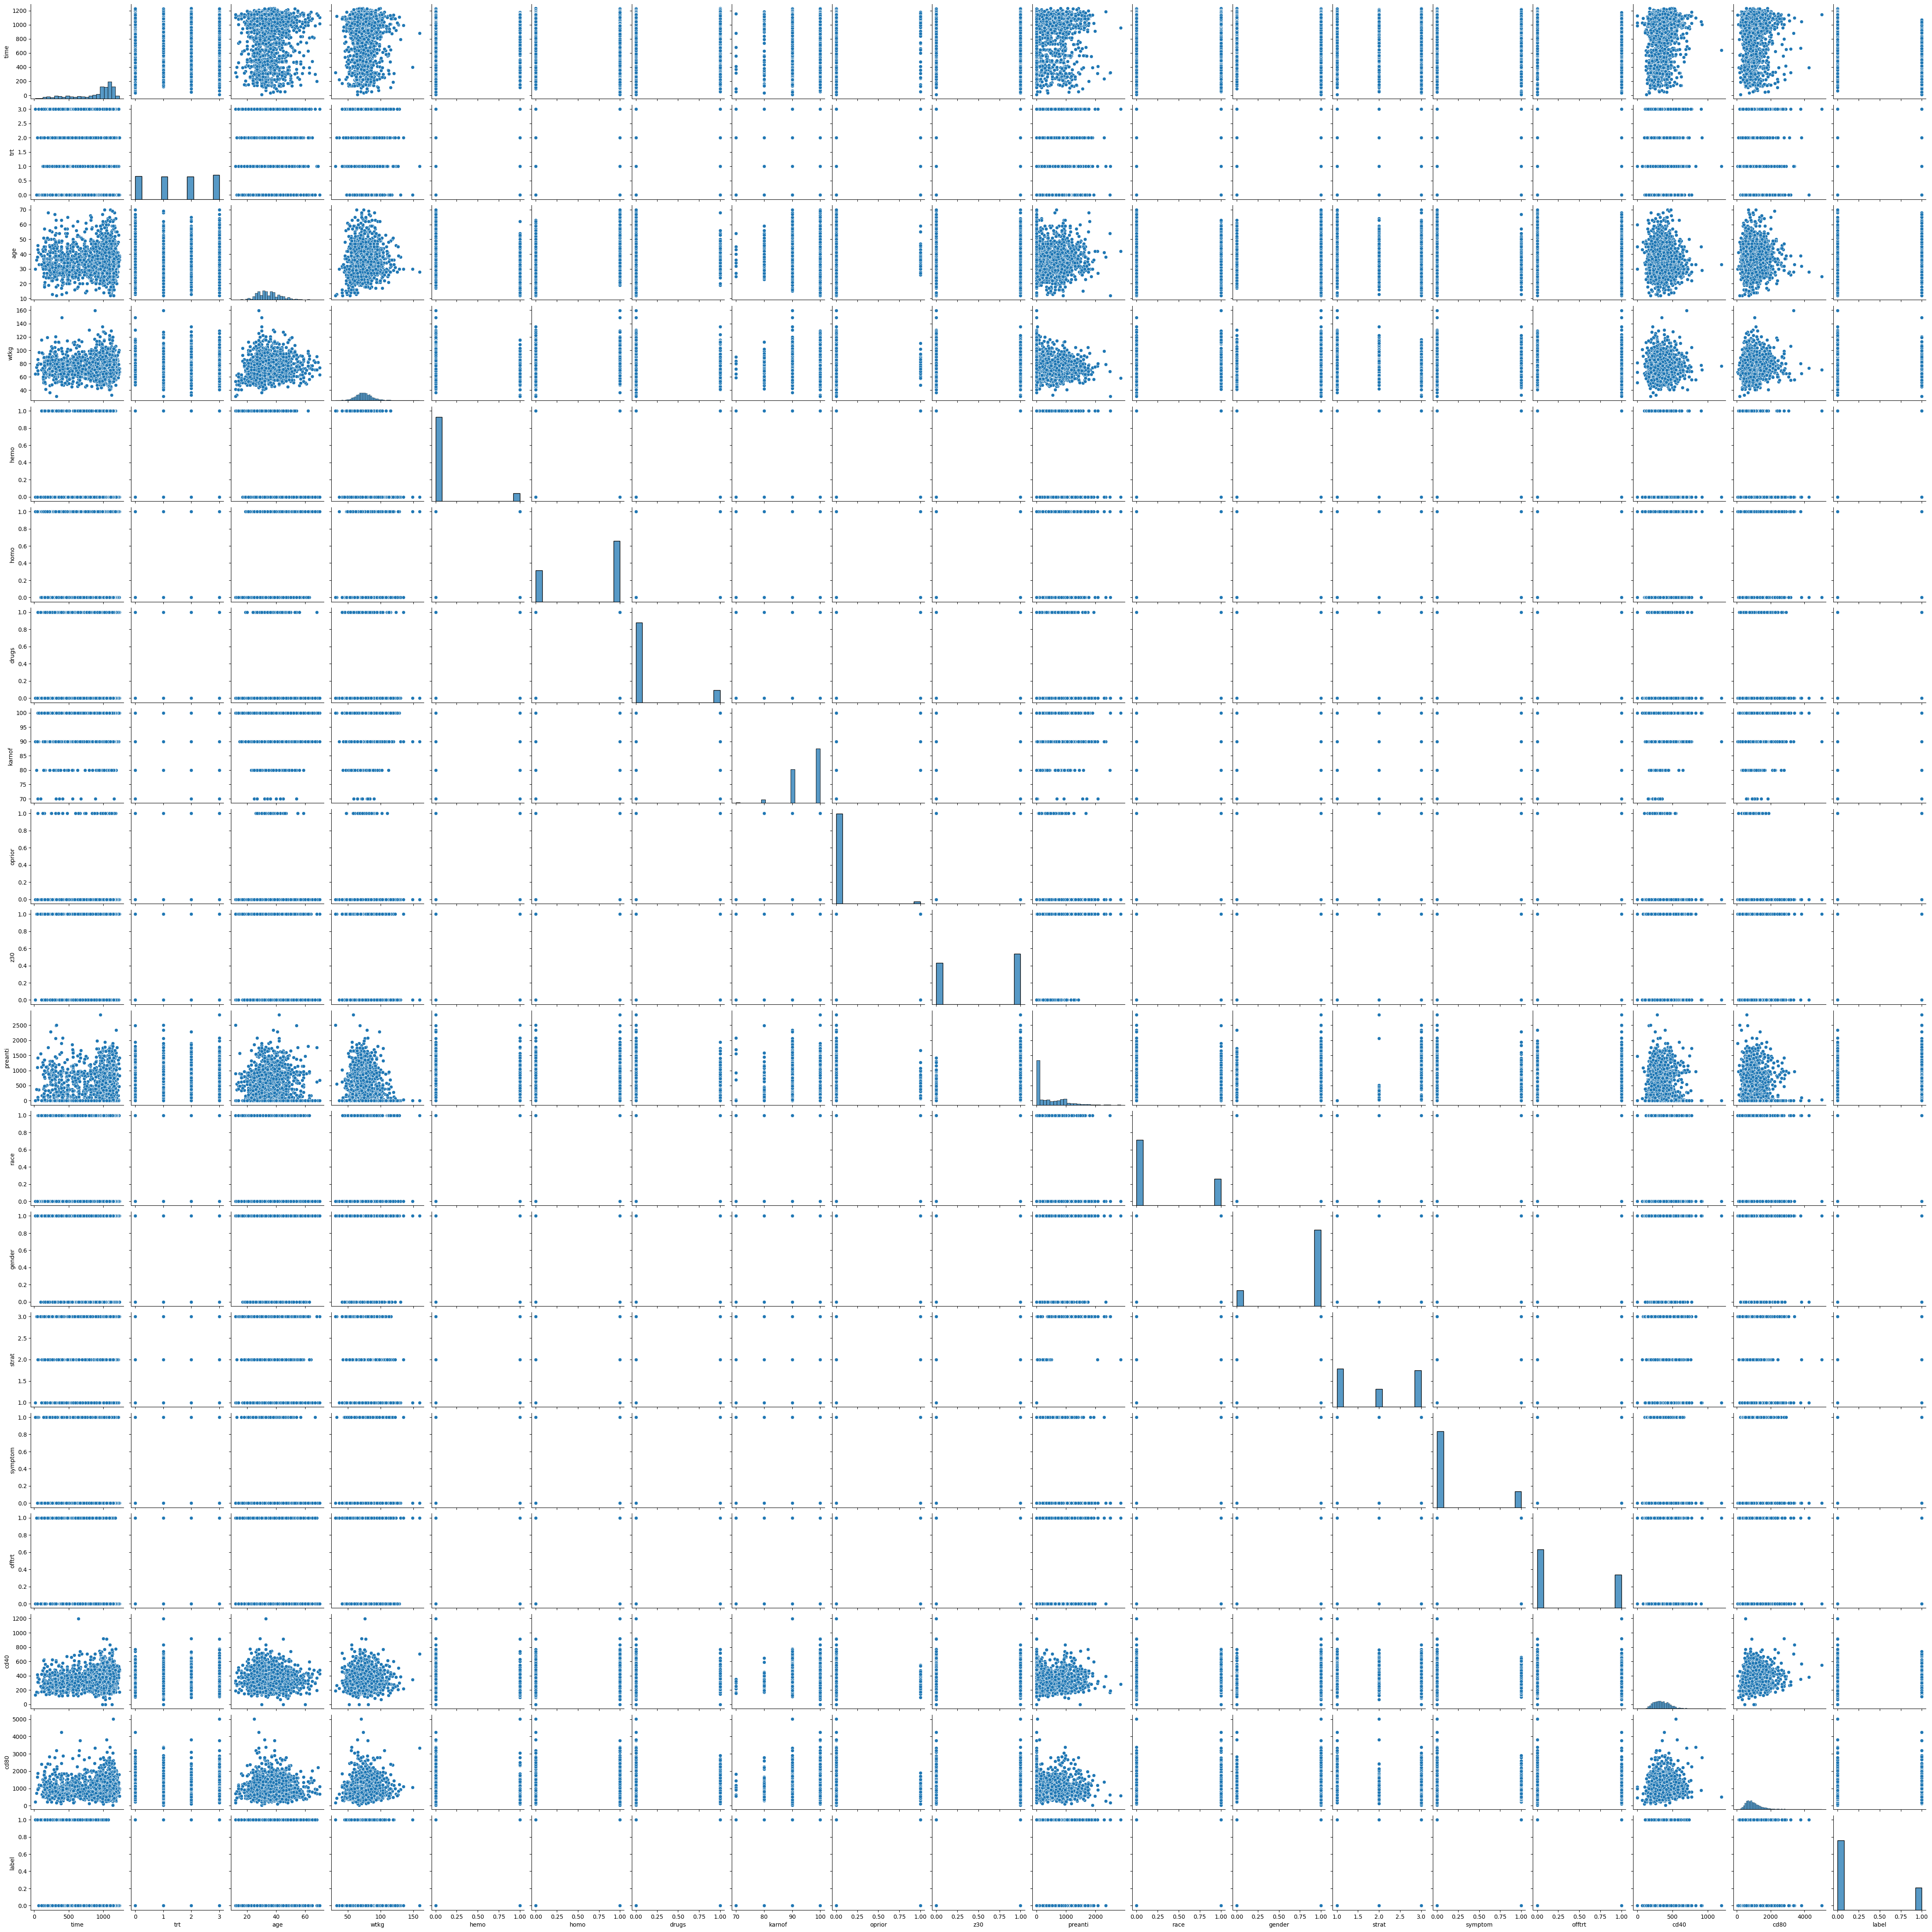

In [ ]:
# Correlation matrix
def compute_correlation_matrix(df, cols):
    corr = df[cols].corr()
    print("\nCorrelation Matrix:")
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
compute_correlation_matrix(df, numeric_cols)

# Pairplot
sns.pairplot(df)
plt.show()

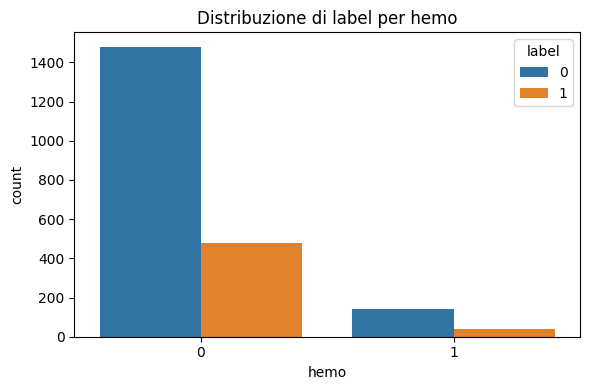

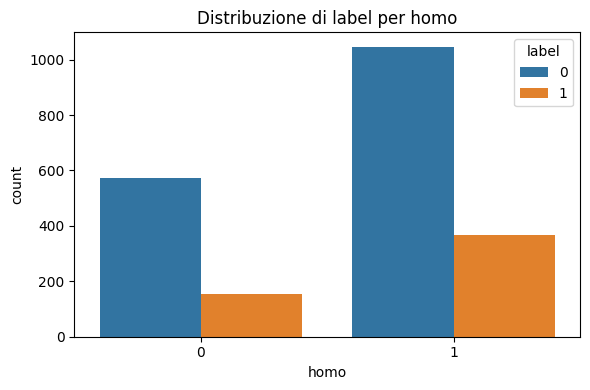

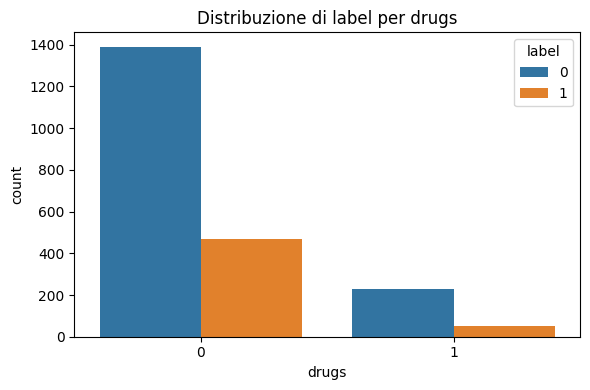

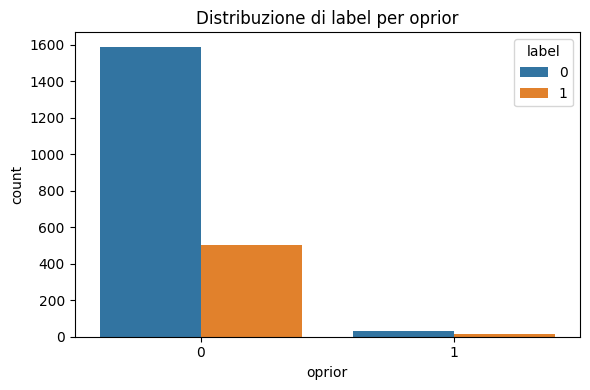

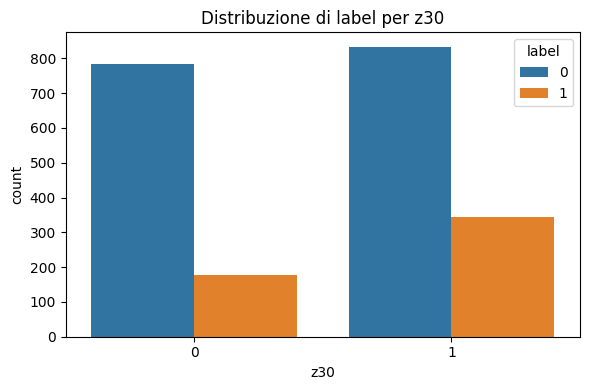

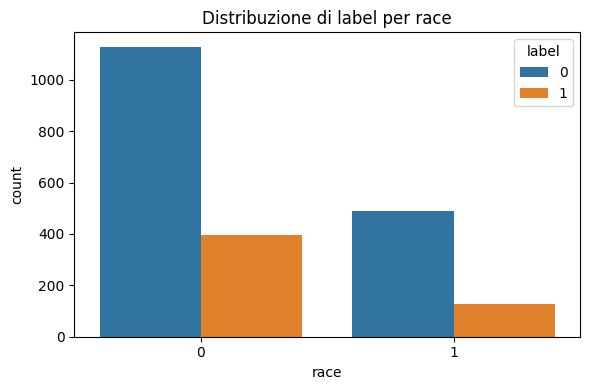

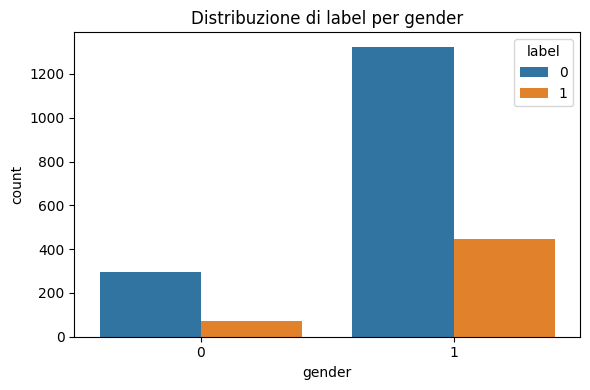

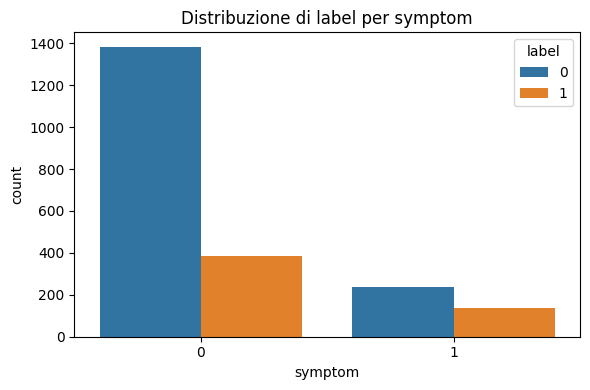

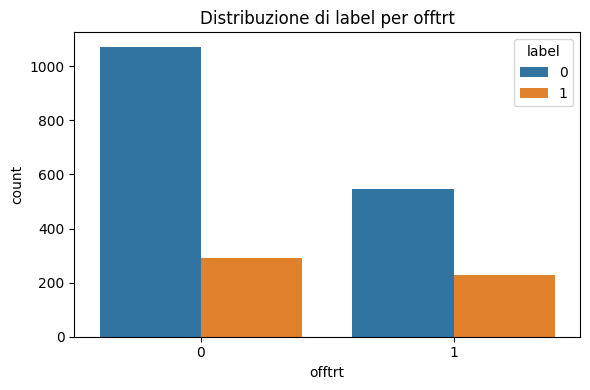

In [ ]:
# Countplot per le colonne binarie
for col in ['hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender', 'symptom', 'offtrt']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue="label", data=df)
        plt.title(f"Distribuzione di label per {col}")
        plt.tight_layout()
        plt.show()


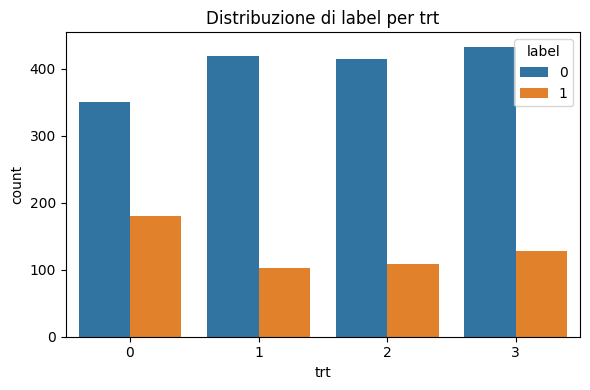

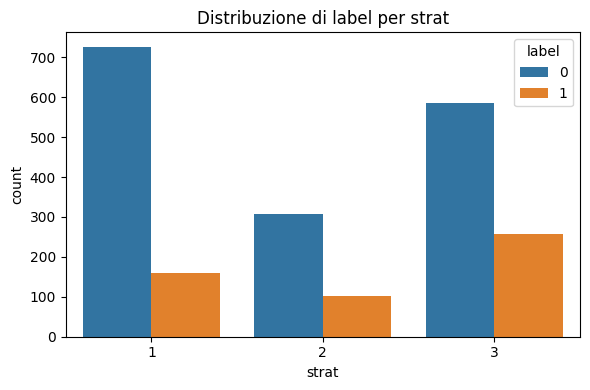

In [ ]:
# Countplot per le colonne 'trt' e 'strat'
for col in ['trt', 'strat']:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue="label", data=df)
        plt.title(f"Distribuzione di label per {col}")
        plt.tight_layout()
        plt.show()

In [ ]:
# Applicazione dell'encoding su 'trt' e 'strat'
df = pd.get_dummies(df, columns=['trt', 'strat'])

# Separazione della variabile target dalle features
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
# Separazione dei dati in training e test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

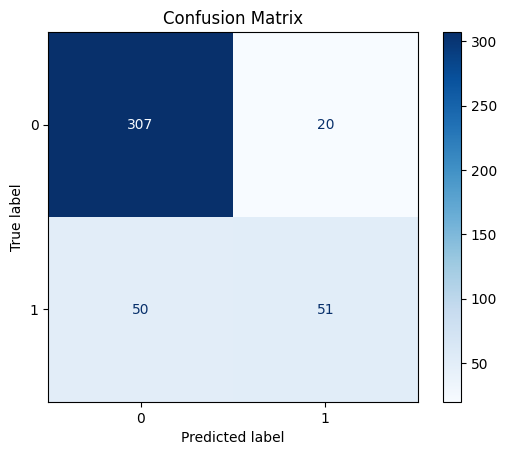


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       327
           1       0.72      0.50      0.59       101

    accuracy                           0.84       428
   macro avg       0.79      0.72      0.75       428
weighted avg       0.83      0.84      0.83       428

Accuratezza sul test set: 0.8364
Miglior parametro C trovato: {'C': 0.1}


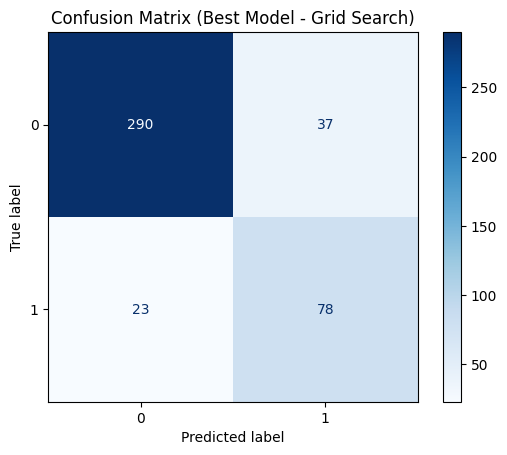

Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1291
           1       0.67      0.77      0.71       420

    accuracy                           0.85      1711
   macro avg       0.79      0.82      0.81      1711
weighted avg       0.86      0.85      0.85      1711


Classification Report con Grid Search:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       327
           1       0.68      0.77      0.72       101

    accuracy                           0.86       428
   macro avg       0.80      0.83      0.81       428
weighted avg       0.87      0.86      0.86       428

Accuratezza sul test set (Best Model): 0.8598


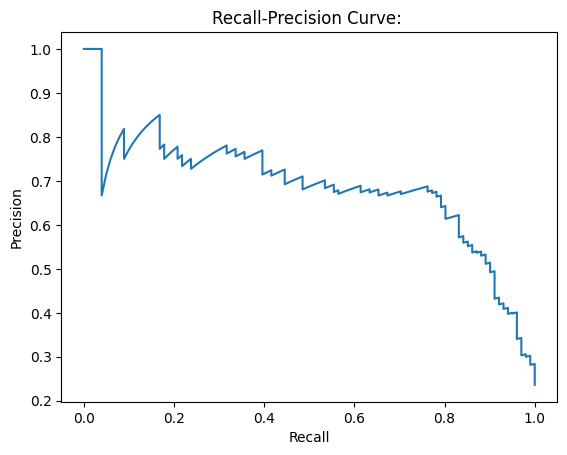

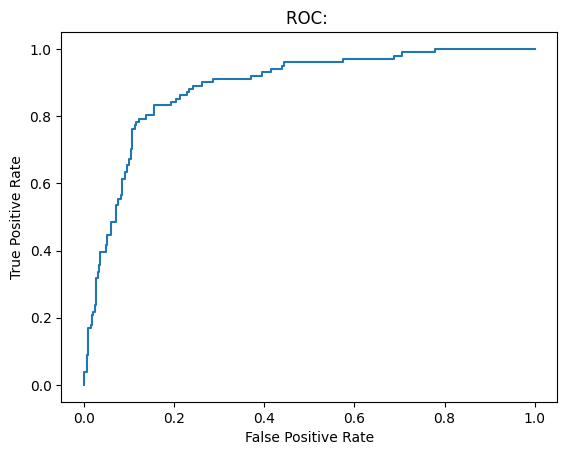

AUC:  0.8869409876767493

Verifica overfitting con curva di apprendimento...
Accuratezza del miglior modello sul training set: 0.8551
Accuratezza del miglior modello sul test set:     0.8598


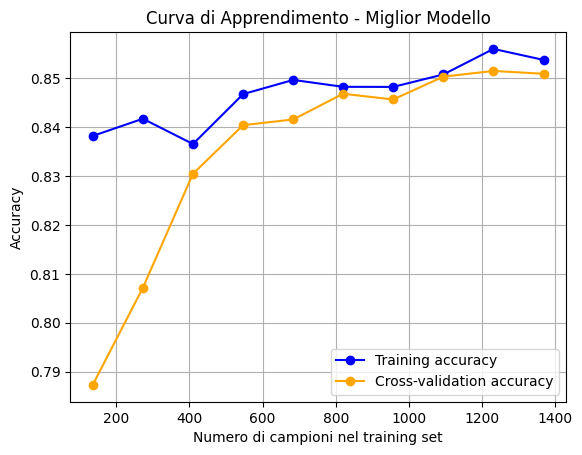

In [ ]:
# Creazione del modello di regressione logistica
model = LogisticRegression(C=1, max_iter=200)

# Addestramento del modello su train
model.fit(X_train_scaled, y_train)
# Predizioni sui dati di test
y_hat_te = model.predict(X_test_scaled)

# Calcolo della confusion matrix
cm = confusion_matrix(y_test, y_hat_te)
# Visualizzazione della confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Visualizzazione metriche di classificazione
print("\nClassification Report:")
print(classification_report(y_test, y_hat_te))

accuracy = accuracy_score(y_test, y_hat_te)
print(f"Accuratezza sul test set: {accuracy:.4f}")

# Definizione griglia di parametri da esplorare
param_grid = {'C': [0.1, 1, 10, 100]}
# Creazione dell'oggetto GridSearchCV per fare la cross-validation
grid_search = GridSearchCV(
    LogisticRegression(max_iter=200, class_weight='balanced'),
    param_grid,
    cv=10,
    scoring='accuracy'
)
# GridSearchCV
grid_search.fit(X_train_scaled, y_train)
# Visualizzare il miglior parametro C trovato
print(f"Miglior parametro C trovato: {grid_search.best_params_}")

# Predizioni con il modello ottimizzato (quello con il miglior parametro C)
best_model = grid_search.best_estimator_
# Predizioni sui dati di test
y_hat_te_best = best_model.predict(X_test_scaled)

# Calcolo della confusion matrix per il modello ottimizzato
cm_best = confusion_matrix(y_test, y_hat_te_best)
ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix (Best Model - Grid Search)')
plt.show()

# Ottieni le predizioni usando cross_val_predict con il miglior modello e cross-validation
y_pred_cv = cross_val_predict(best_model, X_train_scaled, y_train, cv=10)

# Stampa classification report basato sulle predizioni cross-validate
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv))

#Visualizzazione classification Report per il miglior modello
print("\nClassification Report con Grid Search:")
print(classification_report(y_test, y_hat_te_best))

accuracy_best = accuracy_score(y_test, y_hat_te_best)
print(f"Accuratezza sul test set (Best Model): {accuracy_best:.4f}")

# Calcolo curva ROC-AUC per il miglior modello
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Precision and Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(recall, precision)
plt.title("Recall-Precision Curve: ")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print ("AUC: ", auc_score)

# Analisi overfitting
print('\nVerifica overfitting con curva di apprendimento...')

# Accuratezza sul training set
train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuratezza del miglior modello sul training set: {train_accuracy:.4f}")
print(f"Accuratezza del miglior modello sul test set:     {accuracy_best:.4f}")

# Calcolo learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='orange', label='Cross-validation accuracy')
plt.title('Curva di Apprendimento - Miglior Modello')
plt.xlabel('Numero di campioni nel training set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


race = 0 (n=306)
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       237
           1       0.67      0.81      0.74        69

    accuracy                           0.87       306
   macro avg       0.81      0.85      0.82       306
weighted avg       0.88      0.87      0.87       306


race = 1 (n=122)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        90
           1       0.69      0.69      0.69        32

    accuracy                           0.84       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.84      0.84      0.84       122


--- Metriche di Fairness di Gruppo per 'race' ---
Tasso di Selezione (Privileged, race=0): 0.271
Tasso di Selezione (Unprivileged, race=1): 0.262
Differenza di Parità Demografica (DPD): 0.0089
--------------------
Tasso Veri Positivi (Privileged, race=0): 0.812
Tasso Veri Positivi (Unprivileged, race=1): 0.6

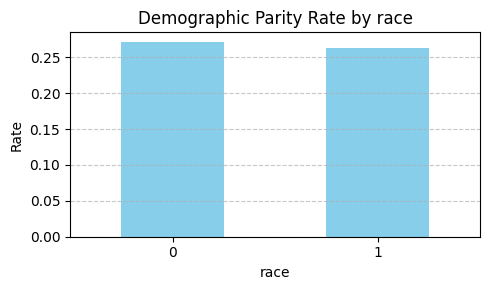

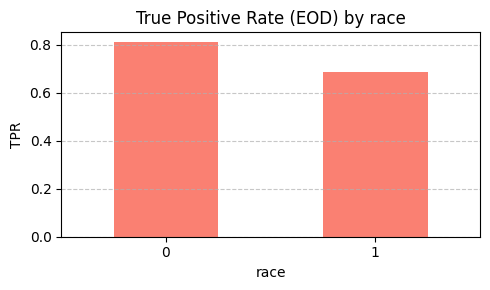


gender = 0 (n=70)
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.61      0.69      0.65        16

    accuracy                           0.83        70
   macro avg       0.76      0.78      0.77        70
weighted avg       0.84      0.83      0.83        70


gender = 1 (n=358)
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       273
           1       0.69      0.79      0.74        85

    accuracy                           0.87       358
   macro avg       0.81      0.84      0.82       358
weighted avg       0.87      0.87      0.87       358


--- Metriche di Fairness di Gruppo per 'gender' ---
Tasso di Selezione (Privileged, gender=1): 0.271
Tasso di Selezione (Unprivileged, gender=0): 0.257
Differenza di Parità Demografica (DPD): 0.0138
--------------------
Tasso Veri Positivi (Privileged, gender=1): 0.788
Tasso Veri Positivi (Unprivileged, g

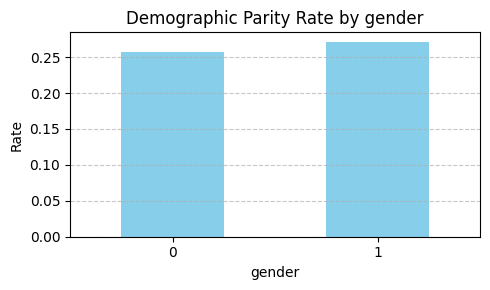

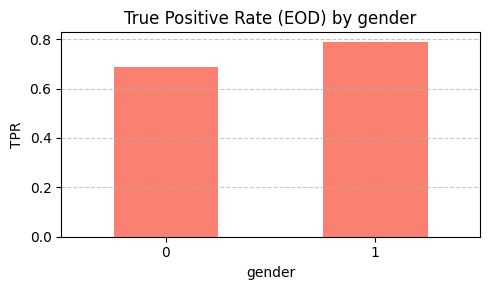


homo = 0 (n=146)
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       117
           1       0.57      0.59      0.58        29

    accuracy                           0.83       146
   macro avg       0.73      0.74      0.73       146
weighted avg       0.83      0.83      0.83       146


homo = 1 (n=282)
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       210
           1       0.72      0.85      0.78        72

    accuracy                           0.88       282
   macro avg       0.83      0.87      0.85       282
weighted avg       0.89      0.88      0.88       282


--- Metriche di Fairness di Gruppo per 'homo' ---
Tasso di Selezione (Privileged, homo=1): 0.301
Tasso di Selezione (Unprivileged, homo=0): 0.205
Differenza di Parità Demografica (DPD): 0.0959
--------------------
Tasso Veri Positivi (Privileged, homo=1): 0.847
Tasso Veri Positivi (Unprivileged, homo=0): 0.5

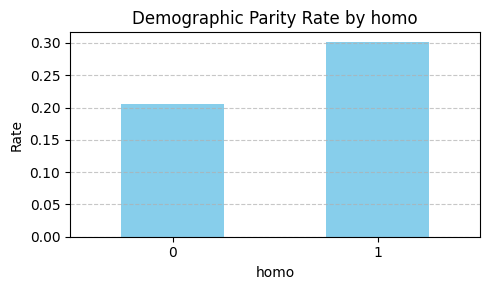

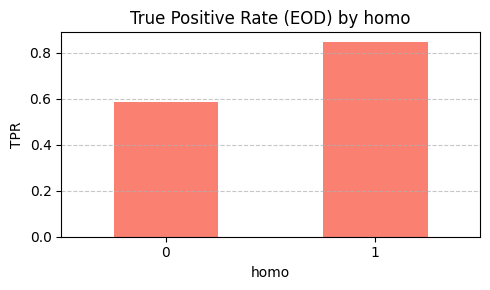

In [ ]:
def analyze_fairness(df, attribute, privileged, unprivileged):
    for val in sorted(df[attribute].unique()):
        sub = df[df[attribute] == val]
        print(f"\n{attribute} = {val} (n={len(sub)})")
        print(classification_report(sub.y_true, sub.y_pred, zero_division=0))

    # Demographic Parity
    dp_rates = df.groupby(attribute)["y_pred"].mean()
    dp_priv = dp_rates[privileged]
    dp_unpriv = dp_rates[unprivileged]
    dp_diff = dp_priv - dp_unpriv

    # Equal Opportunity
    positives = df[df["y_true"] == 1]
    tpr_rates = positives.groupby(attribute)["y_pred"].mean()
    tpr_priv = tpr_rates[privileged]
    tpr_unpriv = tpr_rates[unprivileged]
    eod = tpr_priv - tpr_unpriv

    # Print Metriche
    print(f"\n--- Metriche di Fairness di Gruppo per '{attribute}' ---")
    print(f"Tasso di Selezione (Privileged, {attribute}={privileged}): {dp_priv:.3f}")
    print(f"Tasso di Selezione (Unprivileged, {attribute}={unprivileged}): {dp_unpriv:.3f}")
    print(f"Differenza di Parità Demografica (DPD): {dp_diff:.4f}")
    print("-" * 20)
    print(f"Tasso Veri Positivi (Privileged, {attribute}={privileged}): {tpr_priv:.3f}")
    print(f"Tasso Veri Positivi (Unprivileged, {attribute}={unprivileged}): {tpr_unpriv:.3f}")
    print(f"Differenza di Uguaglianza di Opportunità (EOD): {eod:.4f}\n")

    # Plot DP
    plt.figure(figsize=(5, 3))
    dp_rates.index = dp_rates.index.astype(str)
    dp_rates.plot(kind="bar", color="skyblue")
    plt.title(f"Demographic Parity Rate by {attribute}")
    plt.ylabel("Rate")
    plt.xlabel(attribute)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Plot EO
    plt.figure(figsize=(5, 3))
    tpr_rates.index = tpr_rates.index.astype(str)
    tpr_rates.plot(kind="bar", color="salmon")
    plt.title(f"True Positive Rate (EOD) by {attribute}")
    plt.ylabel("TPR")
    plt.xlabel(attribute)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Costruzione di fair_df
fair_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_hat_te_best,
    "race": X_test["race"].values,
    "gender": X_test["gender"].values,
    "homo": X_test["homo"].values
})

fair_df["y_prob"] = best_model.predict_proba(X_test_scaled)[:, 1]

# Esecuzione per ogni attributo sensibile
analyze_fairness(fair_df, "race", privileged=0, unprivileged=1)
analyze_fairness(fair_df, "gender", privileged=1, unprivileged=0)
analyze_fairness(fair_df, "homo", privileged=1, unprivileged=0)

In [ ]:
# Mitigazione del bias

# Calcolo TPR target del gruppo privilegiato (homo = 1)
privileged_group = 1
unprivileged_group = 0

tpr_target = recall_score(
    fair_df[fair_df.homo == privileged_group].y_true,
    fair_df[fair_df.homo == privileged_group].y_pred
)
print(f"TPR target (homo=1): {tpr_target:.3f}")

# Ricerca soglia ottimale per gruppo svantaggiato (homo = 0)
subset = fair_df[fair_df.homo == unprivileged_group]
best_thresh = 0.5
min_diff = 1.0
for thr in np.arange(0.01, 1.0, 0.01):
    preds = (subset.y_prob >= thr).astype(int)
    tpr = recall_score(subset.y_true, preds, zero_division=0)
    if abs(tpr - tpr_target) < min_diff:
        min_diff = abs(tpr - tpr_target)
        best_thresh = thr

print(f"Soglia ottimale per homo=0: {best_thresh:.2f}")

# Soglia adattiva per y_pred_adj
fair_df["y_pred_adj"] = np.where(
    fair_df.homo == unprivileged_group,
    (fair_df.y_prob >= best_thresh).astype(int),
    fair_df.y_pred  # soglia 0.5 per homo=1
)

# Metriche per ciascun gruppo dopo la mitigazione
def group_metrics(df):
    return (
        accuracy_score(df.y_true, df.y_pred),
        precision_score(df.y_true, df.y_pred, zero_division=0),
        recall_score(df.y_true, df.y_pred, zero_division=0)
    )

print("\nMetriche dopo soglia adattiva su 'homo':")
for g in [0, 1]:
    sub = fair_df[fair_df.homo == g].copy()
    sub["y_pred"] = sub.y_pred_adj
    acc, prec, rec = group_metrics(sub)
    print(f"\nGruppo homo={g}")
    print(f" accuracy  : {acc:.3f}")
    print(f" precision : {prec:.3f}")
    print(f" recall    : {rec:.3f}")

# Calcolo DPD e EOD dopo aggiustamento :
# DPD
rate_priv = (fair_df[fair_df.homo == privileged_group].y_pred_adj == 1).mean()
rate_unpriv = (fair_df[fair_df.homo == unprivileged_group].y_pred_adj == 1).mean()
dpd_post = rate_priv - rate_unpriv
print(f"\nDPD dopo aggiustamento: {dpd_post:.3f}")

# EOD
pos_priv = fair_df[(fair_df.homo == privileged_group) & (fair_df.y_true == 1)]
pos_unpriv = fair_df[(fair_df.homo == unprivileged_group) & (fair_df.y_true == 1)]

tpr_priv_post = (pos_priv.y_pred_adj == 1).mean()
tpr_unpriv_post = (pos_unpriv.y_pred_adj == 1).mean()
eod_post = tpr_priv_post - tpr_unpriv_post

print(f"EOD dopo aggiustamento: {eod_post:.3f}")

TPR target (homo=1): 0.847
Soglia ottimale per homo=0: 0.22

Metriche dopo soglia adattiva su 'homo':

Gruppo homo=0
 accuracy  : 0.719
 precision : 0.400
 recall    : 0.828

Gruppo homo=1
 accuracy  : 0.876
 precision : 0.718
 recall    : 0.847

DPD dopo aggiustamento: -0.110
EOD dopo aggiustamento: 0.020


In [ ]:
!pip install shap
import shap
from sklearn.inspection import PartialDependenceDisplay
print('SHAP e PartialDependenceDisplay importati con successo!')

SHAP e PartialDependenceDisplay importati con successo!



Analisi SHAP:


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


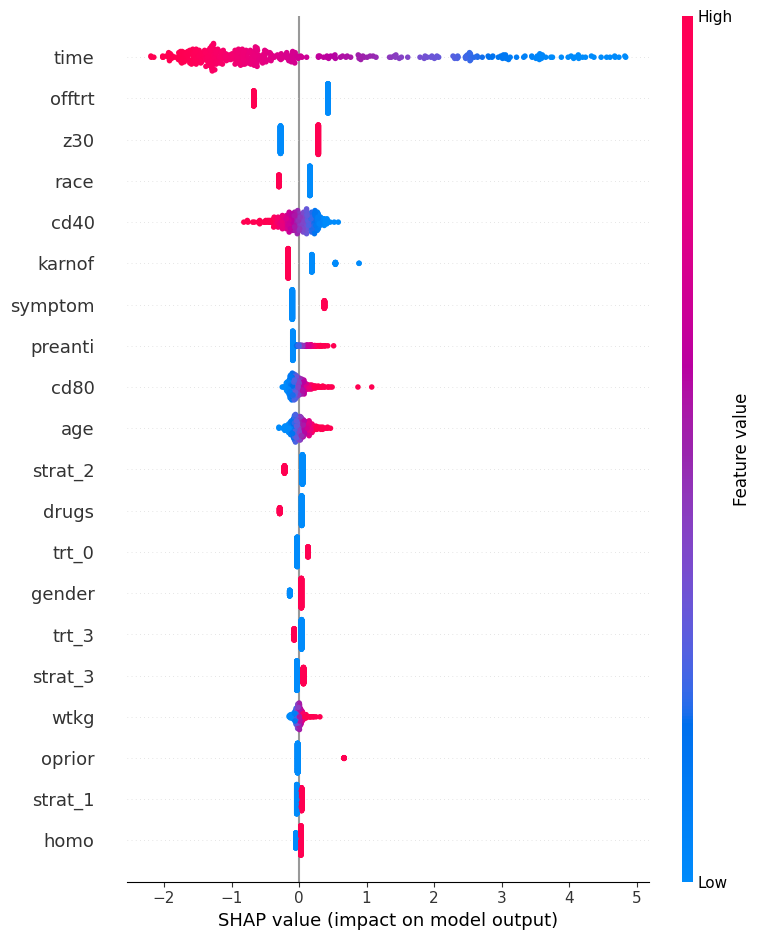

In [ ]:
print("\nAnalisi SHAP:")

# Definizione dell'explainer compatibile con Regressione Logistica, utilizzo del best model
explainer = shap.LinearExplainer(best_model, X_train_scaled, feature_perturbation="interventional")

# Calcolo dei valori SHAP per ciascun esempio di test set
shap_values = explainer.shap_values(X_test_scaled)

# Visualizzazione summary plot globale
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns.tolist())



PDP per 'time'...


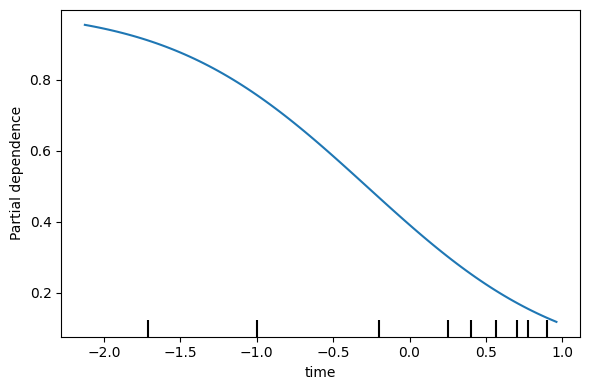


PDP per 'cd40'...


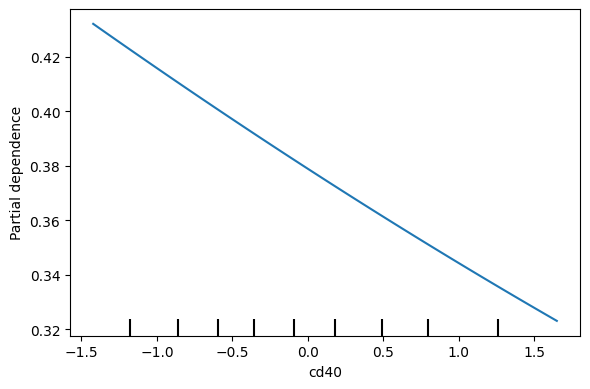


PDP per 'age'...


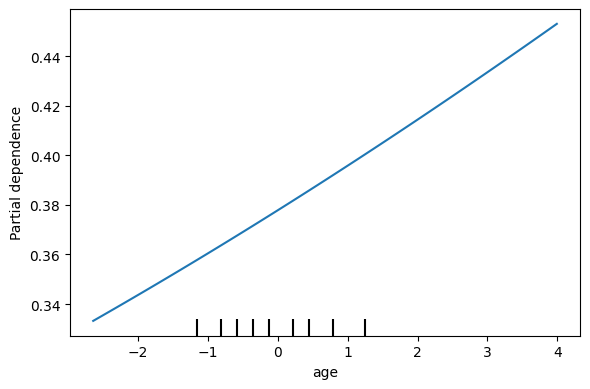

In [ ]:
def plot_pdp(features, model, X_scaled, X_columns, grid_resolution=100):
    for feature in features:
        print(f"\nPDP per '{feature}'...")
        fig, ax = plt.subplots(figsize=(6, 4))
        PartialDependenceDisplay.from_estimator(
            model,
            X_scaled,
            features=[X_columns.index(feature)],
            feature_names=X_columns,
            kind="average",
            grid_resolution=grid_resolution,
            ax=ax
        )
        plt.tight_layout()
        plt.show()

plot_pdp(features=["time", "cd40", "age"], model=best_model, X_scaled=X_train_scaled, X_columns=X.columns.tolist())


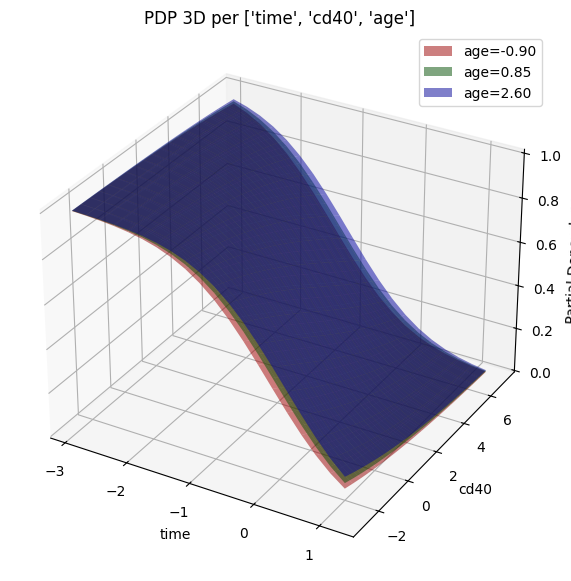

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # serve per 3D plots

def plot_pdp_3d(features, model, X_scaled, X_columns, grid_points=10):
    assert len(features) == 3

    # Indici feature
    idx1, idx2, idx3 = [X_columns.index(f) for f in features]

    # Range di valori per ogni feature
    vals1 = np.linspace(X_scaled[:, idx1].min(), X_scaled[:, idx1].max(), grid_points)
    vals2 = np.linspace(X_scaled[:, idx2].min(), X_scaled[:, idx2].max(), grid_points)
    vals3 = np.linspace(X_scaled[:, idx3].min(), X_scaled[:, idx3].max(), grid_points)

    # Griglia 3D
    grid1, grid2, grid3 = np.meshgrid(vals1, vals2, vals3, indexing='ij')

    # Array per i valori PDP
    pdp_vals = np.zeros(grid1.shape)

    # Calcolo PDP: per ogni punto della griglia, sostituisco le 3 feature e calcolo la media predizione
    for i in range(grid_points):
        for j in range(grid_points):
            for k in range(grid_points):
                X_temp = X_scaled.copy()
                X_temp[:, idx1] = grid1[i, j, k]
                X_temp[:, idx2] = grid2[i, j, k]
                X_temp[:, idx3] = grid3[i, j, k]
                preds = model.predict_proba(X_temp)[:, 1]
                pdp_vals[i, j, k] = np.mean(preds)

    # Visualizzazione: per 3D possiamo mostrare alcune "slice" per la 3a feature
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Slice da plottare
    slices = [grid_points//4, grid_points//2, 3*grid_points//4]
    colors = ['red', 'green', 'blue']

    for slice_idx, color in zip(slices, colors):
        # Superficie corrispondente alla slice
        Xs = grid1[:, :, slice_idx]
        Ys = grid2[:, :, slice_idx]
        Zs = pdp_vals[:, :, slice_idx]
        # Plot superficie
        ax.plot_surface(Xs, Ys, Zs, color=color, alpha=0.5, label=f'{features[2]}={vals3[slice_idx]:.2f}')

    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel('Partial Dependence')
    ax.set_title(f'PDP 3D per {features}')
    plt.legend()
    plt.show()

plot_pdp_3d(
    features=["time", "cd40", "age"],
    model=best_model,
    X_scaled=X_train_scaled,
    X_columns=X.columns.tolist(),
    grid_points=20
)



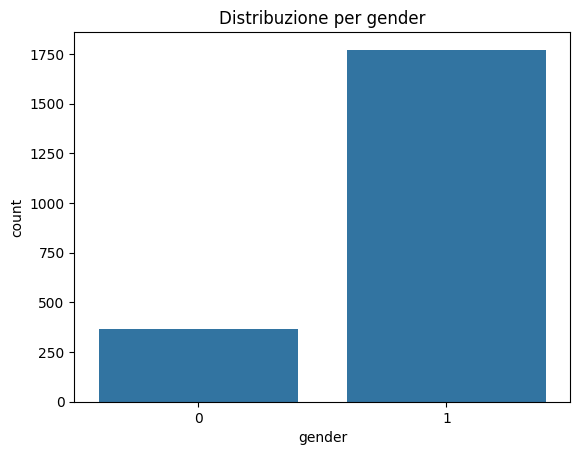

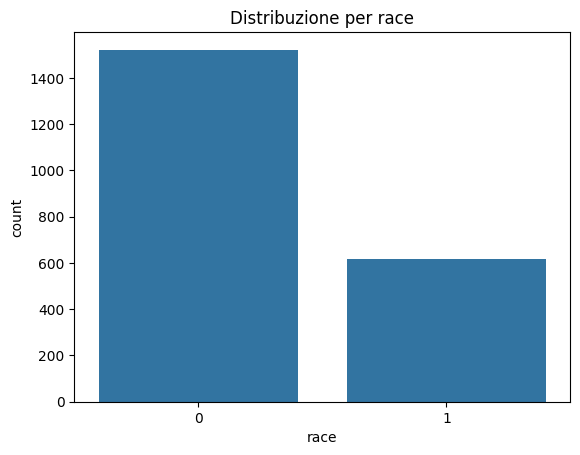

Quasi-identificatori iniziali: ['age', 'race', 'wtkg', 'karnof', 'gender']
k iniziale: 1
Generalizzo gender a '*' per aumentare k
k dopo generalizzazione gender: 8

K finale = 8

Prime 5 righe del dataset anonimizzato:


,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,symptom,offtrt,cd40,cd80,label,trt_0,trt_1,trt_2,trt_3,strat_1,strat_2,strat_3
0,948,<50,heavy,0,0,0,high,0,0,0,0,*,0,0,422,566,0,False,False,True,False,True,False,False
1,1002,>=50,light,0,0,0,high,0,1,895,0,*,0,0,162,392,1,False,False,False,True,False,False,True
2,961,<50,heavy,0,1,1,high,0,1,707,0,*,0,1,326,2063,0,False,False,False,True,False,False,True
3,1166,<50,heavy,0,1,0,high,0,1,1399,0,*,0,0,287,1590,0,False,False,False,True,False,False,True
4,1090,<50,light,0,1,0,high,0,1,1352,0,*,0,0,504,870,0,True,False,False,False,False,False,True



Dimensioni dei gruppi di equivalenza:


/tmp/ipython-input-16-2581444680.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_sizes = anon_df.groupby(quasi_ids).size().sort_values(ascending=False)


age   race  wtkg   karnof  gender
<50   0     light  high    *         716
            heavy  high    *         712
      1     light  high    *         341
            heavy  high    *         247
>=50  0     heavy  high    *          52
            light  high    *          42
      1     light  high    *          21
            heavy  high    *           8
<50   1     heavy  low     *           0
            light  low     *           0
dtype: int64

min = 0  max = 716  gruppi = 16



In [ ]:
from IPython.display import display

def min_k(df, qi_cols):
    sizes = df.groupby(qi_cols, observed=True).size()
    return sizes[sizes > 0].min()

def generalize_numerics(df):
    df = df.copy()
    # due gruppi per age
    df['age'] = pd.cut(df['age'], bins=[-np.inf, 49, np.inf], labels=["<50", ">=50"])
    # due gruppi per wtkg
    df['wtkg'] = pd.cut(df['wtkg'], bins=[-np.inf, 74.9, np.inf], labels=["light", "heavy"])
    # due gruppi per karnof
    df['karnof'] = pd.cut(df['karnof'], bins=[0, 50, 100], labels=["low", "high"])
    return df

def progressive_generalization(df, quasi_ids, k_threshold=10):
    df_gen = df.copy()
    print(f"Quasi-identificatori iniziali: {quasi_ids}")

    # Primo calcolo k con quasi-identificatori
    k_now = min_k(df_gen, quasi_ids)
    print(f"k iniziale: {k_now}")

    # Se k troppo basso, generalizzo gender
    if k_now < k_threshold and 'gender' in quasi_ids:
        print("Generalizzo gender a '*' per aumentare k")
        df_gen['gender'] = "*"
        k_now = min_k(df_gen, quasi_ids)
        print(f"k dopo generalizzazione gender: {k_now}")

    # K finale
    print(f"\nK finale = {k_now}")

    # Costruzione dataset anonimizzato
    anon_df = df_gen.copy()

    print("\nPrime 5 righe del dataset anonimizzato:")
    display(anon_df.head())

    # Dimensioni dei gruppi di equivalenza
    print("\nDimensioni dei gruppi di equivalenza:")
    grp_sizes = anon_df.groupby(quasi_ids).size().sort_values(ascending=False)
    display(grp_sizes.head(10))
    print(f"min = {grp_sizes.min()}  max = {grp_sizes.max()}  gruppi = {len(grp_sizes)}\n")

    return anon_df

# USO:

# Mostro la distribuzione gender/race
sns.countplot(x='gender', data=df)
plt.title('Distribuzione per gender')
plt.show()

sns.countplot(x='race', data=df)
plt.title('Distribuzione per race')
plt.show()

# Definisco i quasi-identificatori
quasi_ids = ["age", "race", "wtkg", "karnof", "gender"]

# Applico generalizzazione numerica
df_gen_num = generalize_numerics(df)

# Applico generalizzazione progressiva e stampo i risultati
df_anon = progressive_generalization(df_gen_num, quasi_ids)

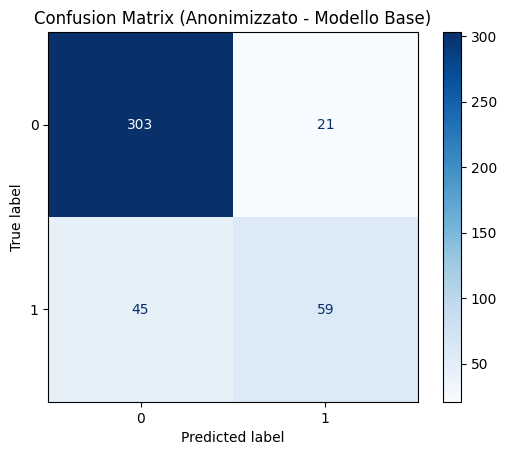

Classification Report (Modello Base):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       324
           1       0.74      0.57      0.64       104

    accuracy                           0.85       428
   macro avg       0.80      0.75      0.77       428
weighted avg       0.84      0.85      0.84       428

Accuratezza sul test (Modello Base): 0.8458

Miglior parametro C: {'C': 1}


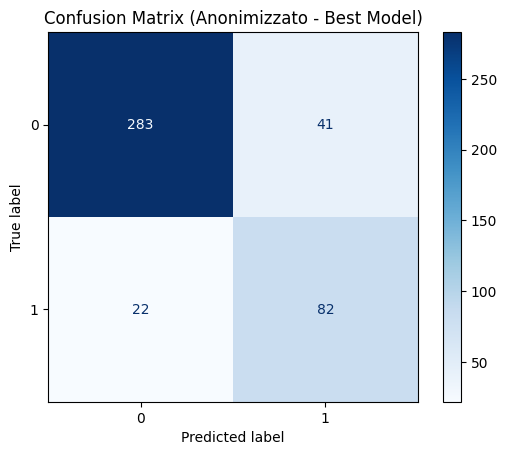


Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1294
           1       0.67      0.77      0.72       417

    accuracy                           0.85      1711
   macro avg       0.79      0.82      0.81      1711
weighted avg       0.86      0.85      0.85      1711

Classification Report (GridSearch):
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       324
           1       0.67      0.79      0.72       104

    accuracy                           0.85       428
   macro avg       0.80      0.83      0.81       428
weighted avg       0.86      0.85      0.86       428

Accuratezza sul test (Best Model): 0.8528


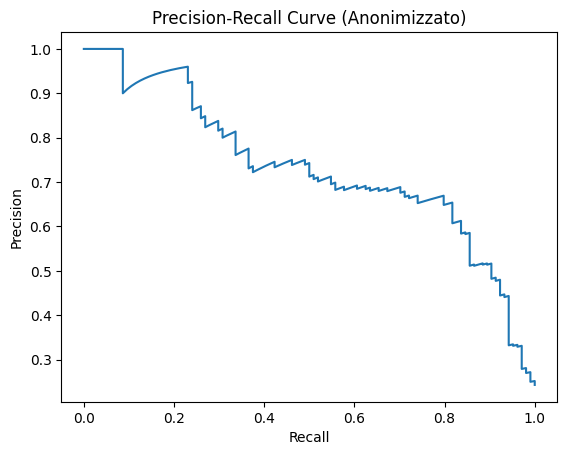

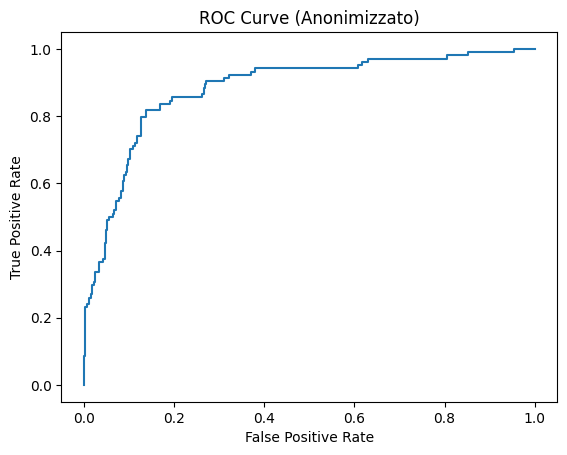

ROC-AUC: 0.8822

Verifica overfitting con curva di apprendimento...
Accuratezza del miglior modello sul training set: 0.8597
Accuratezza del miglior modello sul test set:     0.8528


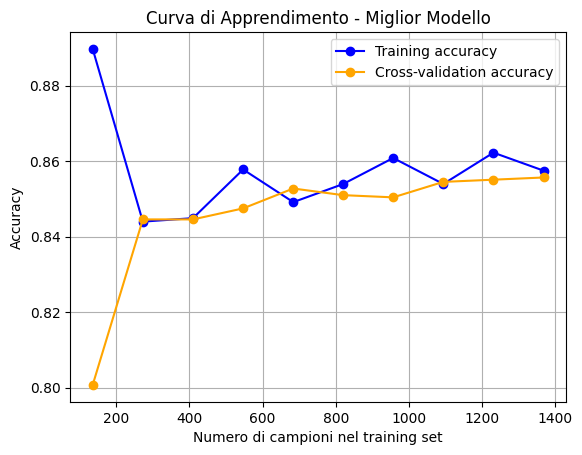

In [ ]:
# Definizione X e y
X_anon = df_anon.drop(columns=['label'])  # tutte le colonne tranne la label
y_anon = df_anon['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_anon, y_anon, test_size=0.2, random_state=42, stratify=y_anon
)

# Codifica variabili categoriche con One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, drop_first=True)

# Allineare le colonne (in caso manchino dummies in test rispetto al train)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Scaling SOLO sui dati numerici (dopo la codifica one-hot)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled  = scaler.transform(X_test_encoded)

# Modello base
model = LogisticRegression(C=1, max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Confusion matrix + report
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix (Anonimizzato - Modello Base)')
plt.show()

print("Classification Report (Modello Base):")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza sul test (Modello Base): {accuracy:.4f}")

# GridSearchCV con class_weight bilanciato
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(
    LogisticRegression(max_iter=200, class_weight='balanced'),
    param_grid,
    cv=10,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train)
print(f"\nMiglior parametro C: {grid.best_params_}")

# Valutazione modello migliore
best = grid.best_estimator_
y_pred_best = best.predict(X_test_scaled)

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix (Anonimizzato - Best Model)')
plt.show()

# Predizioni con cross-validation sui dati di training
y_pred_val = cross_val_predict(best, X_train_scaled, y_train, cv=10)

print("\nClassification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_val))

print("Classification Report (GridSearch):")
print(classification_report(y_test, y_pred_best))

from sklearn.metrics import accuracy_score
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuratezza sul test (Best Model): {accuracy_best:.4f}")

# ROC e precision-recall
probs = best.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, probs)

precision, recall, _ = precision_recall_curve(y_test, probs)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve (Anonimizzato)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.title("ROC Curve (Anonimizzato)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(f"ROC-AUC: {roc_auc:.4f}")

# Verifica overfitting tramite curva di apprendimento

print('\nVerifica overfitting con curva di apprendimento...')

# Accuratezza sul training set
train_pred = best.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuratezza del miglior modello sul training set: {train_accuracy:.4f}")
print(f"Accuratezza del miglior modello sul test set:     {accuracy_best:.4f}")

# Calcolo learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='orange', label='Cross-validation accuracy')
plt.title('Curva di Apprendimento - Miglior Modello')
plt.xlabel('Numero di campioni nel training set')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Analisi SHAP sul modello anonimizzato:


/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


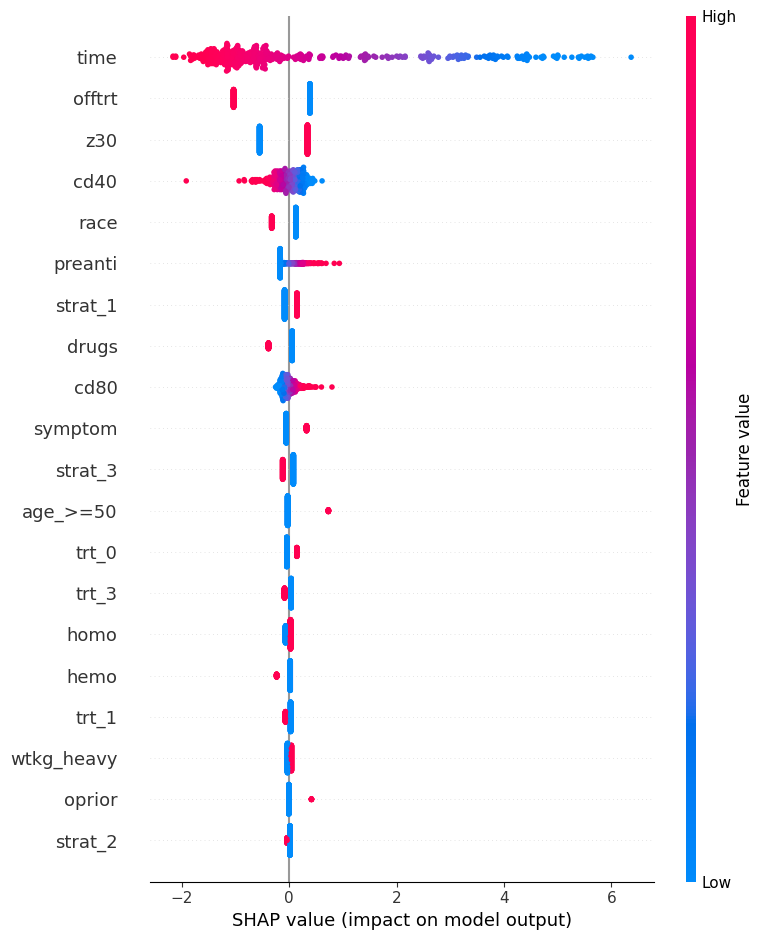

In [ ]:
# SHAP: interpretabilità dopo k-anonimity

print("\nAnalisi SHAP sul modello anonimizzato:")
X_test_shap = pd.DataFrame(X_test_scaled, columns=X_train_encoded.columns)

# LinearExplainer per modelli lineari
explainer = shap.LinearExplainer(best, X_train_scaled, feature_perturbation="interventional")

# Valori SHAP sul test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary globale (importanza media delle feature)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train_encoded.columns.tolist())
